In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\Akshay\Desktop\Practice\Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
import seaborn as sns

<Axes: >

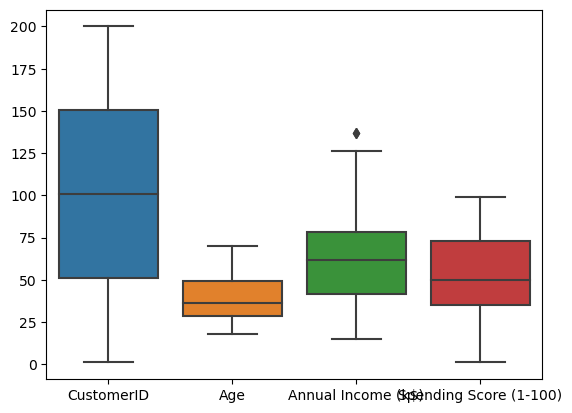

In [7]:
sns.boxplot(data=df)

In [8]:
df_final=df.copy()

In [9]:
df=df.drop('CustomerID',axis=1)

In [10]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
df_cat=df.select_dtypes(exclude=np.number)
df_num=df.select_dtypes(include=np.number)

In [12]:
from sklearn.preprocessing import LabelBinarizer
# Treatment of categorical data
LB=LabelBinarizer()
df_cat=df.select_dtypes(exclude=np.number)
for col in df_cat:
    df[col]=LB.fit_transform(df[col])

In [13]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [21]:
samples=df.values

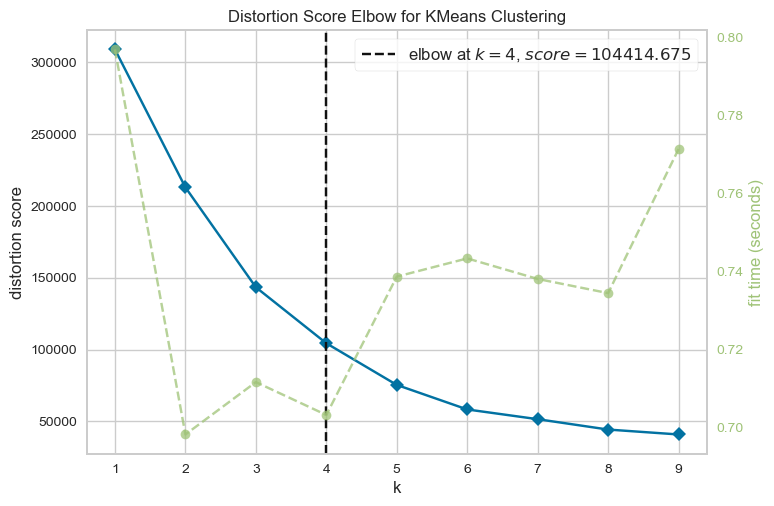

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer=KElbowVisualizer(km,k=(1,10))
visualizer.fit(samples)
visualizer.show()

In [16]:
model2=KMeans(n_clusters=4,max_iter=100,random_state=50)

In [17]:
df_final['Cluster']=model2.fit_predict(samples)
df_final.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [18]:
df_final.Cluster.value_counts()

0    95
2    39
1    38
3    28
Name: Cluster, dtype: int64

In [19]:
Submission=df_final.loc[:,['CustomerID','Cluster']]
Submission

,CustomerID,Cluster
0,1,3
1,2,3
2,3,0
3,4,3
4,5,0
...,...,...
195,196,2
196,197,1
197,198,2
198,199,1
